Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking, Optim
gr(size=(600,300));

### snippet 2.6 (see snippet 3_2 for explanations)

In [2]:
p_grid = range(0, step=0.001, stop=1)
prior = ones(length(p_grid))
likelihood = [pdf(Binomial(9, p), 6) for p in p_grid]
posterior = likelihood .* prior
posterior = posterior / sum(posterior)
samples = sample(p_grid, Weights(posterior), length(p_grid));
samples[1:5]

5-element Array{Float64,1}:
 0.505
 0.5  
 0.601
 0.872
 0.86 

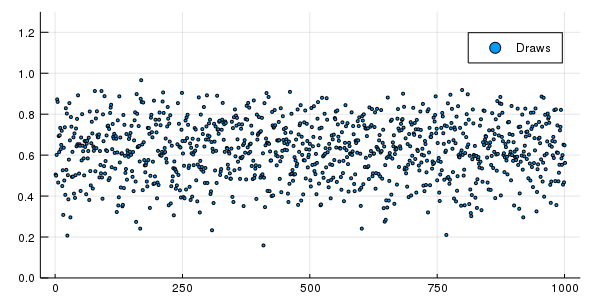

In [3]:
p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 2)
p[1] = scatter(1:length(p_grid), samples, markersize = 2, ylim=(0.0, 1.3), lab="Draws")

analytical calculation

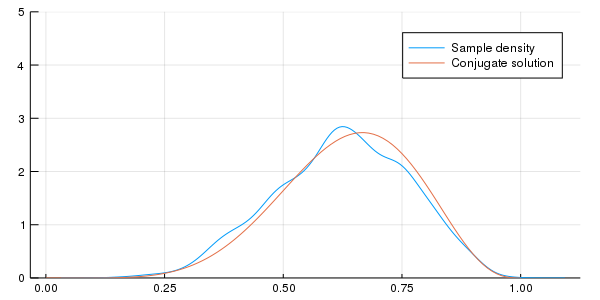

In [4]:
w = 6
n = 9
x = 0:0.01:1
p[2] = density(samples, ylim=(0.0, 5.0), lab="Sample density")
p[2] = plot!( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")

quadratic approximation

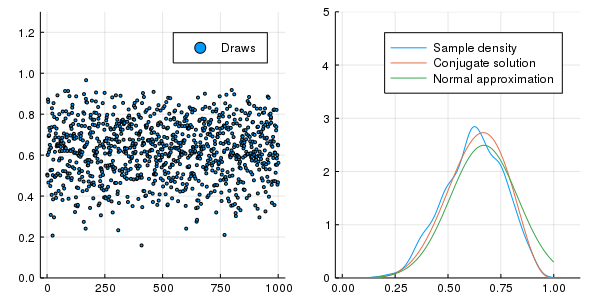

In [5]:
plot!( p[2], x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")
plot(p..., layout=(1, 2))

### snippet 2.7

analytical calculation

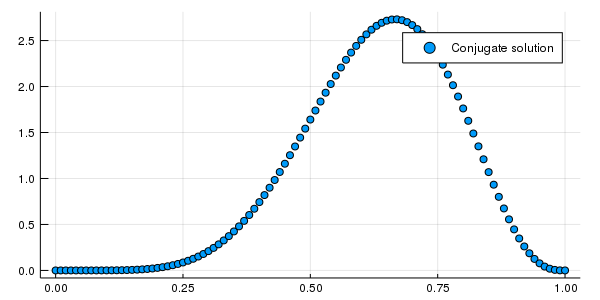

In [6]:
w = 6; n = 9; x = 0:0.01:1
scatter( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")

quadratic approximation

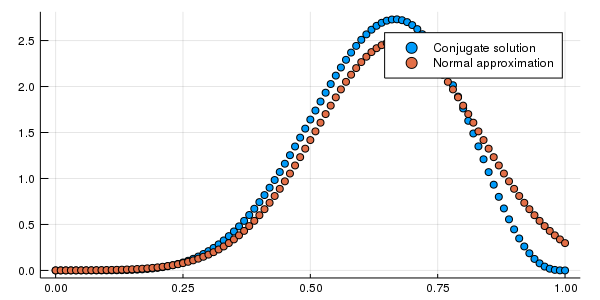

In [7]:
scatter!( x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")

End of `clip_06_07.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*